In [90]:
import os
from pathlib import Path
from datetime import datetime
from herbie import Herbie
%pdb off
%matplotlib inline
print (os.getenv('CONDA_PROMPT_MODIFIER'), datetime.now())

Automatic pdb calling has been turned OFF
(ARIA)  2023-09-07 09:27:21.243326


In [81]:
model   = 'hrrr'
product = 'nat'
fxx    = 0
wd = Path(os.getenv('dataroot', './'))
wd = wd / 'HRRR_availability'
valid_range = (datetime(2016, 7, 15, 0), datetime.today())
available_dates = dates = pd.date_range(valid_range[0], valid_range[1], freq='H')
n_dt = len(available_dates)

In [84]:
lst_exist = []
lst_miss  = []
srcs = []
print ('Started at:', datetime.now())
for i, dt in enumerate(available_dates):
    if i % 5000 == 0:
        print (f'Date {i} of {n_dt}')
        
    H = Herbie(
        dt.strftime('%Y-%m-%d %H:%M'),
        model=model,
        product=product,
        fxx=fxx,
        overwrite=False,
        verbose=False,
        save_dir=wd
    )
    
    src = H.grib_source
    if src is None:
        lst_miss.append(dt)
    else:
        lst_exist.append(dt)
    srcs.append(src)

print ('Finished at:', datetime.now())

Started at: 2023-09-06 19:36:59.289994
Date 0 of 62636
Date 5000 of 62636
Date 10000 of 62636
Date 15000 of 62636
Date 20000 of 62636
Date 25000 of 62636
Date 30000 of 62636
Date 35000 of 62636
Date 40000 of 62636
Date 45000 of 62636
Date 50000 of 62636
Date 55000 of 62636
Finished at: 2023-09-07 09:06:18.240831


In [85]:
len(lst_exist)

61739

In [86]:
len(lst_miss)

897

In [96]:
print (f'Percent Missing: {100*len(lst_miss)/n_dt:.2f}%')

Percent Missing: 1.43%


Text(0, 0.5, 'Number of hours')

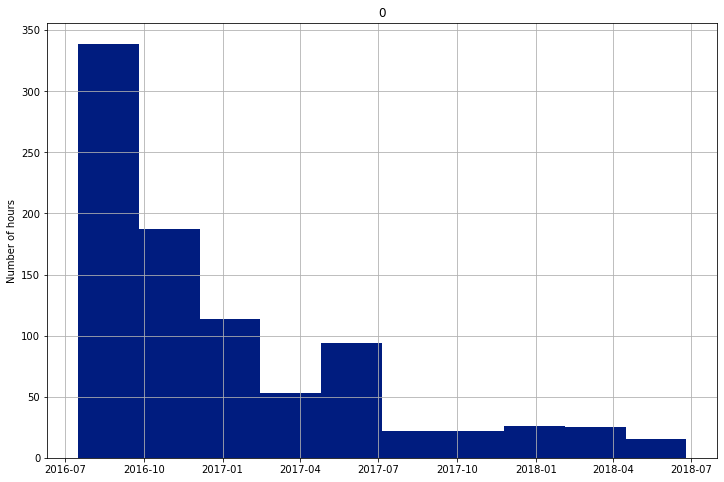

In [107]:
fig, axes = plt.subplots(figsize=(12,8))
pd.DataFrame(lst_miss).hist(ax=axes)
axes.set_ylabel('Number of hours')

In [115]:
ser_srcs = pd.Series(srcs)
ser_srcs.value_counts() # local is one I downloaded

aws      61651
pando       87
local        1
dtype: int64